# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [1]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.37158991 2.17764297 2.17927267 2.85319197 2.99290809 2.26449697
 2.17800922 2.52293346 2.03436049 2.36762622]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [2]:
def uniform_numbers (bottom, ceiling, count):
    my_uniform = uniform(bottom, ceiling - bottom)
    random_numbers = my_uniform.rvs(size = count)
    return random_numbers

In [3]:
first = uniform_numbers (10,15,100)
second = uniform_numbers (10,60,1000)

In [4]:
# Viz mantra
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (10., 5.)})
sns.set_style('whitegrid')

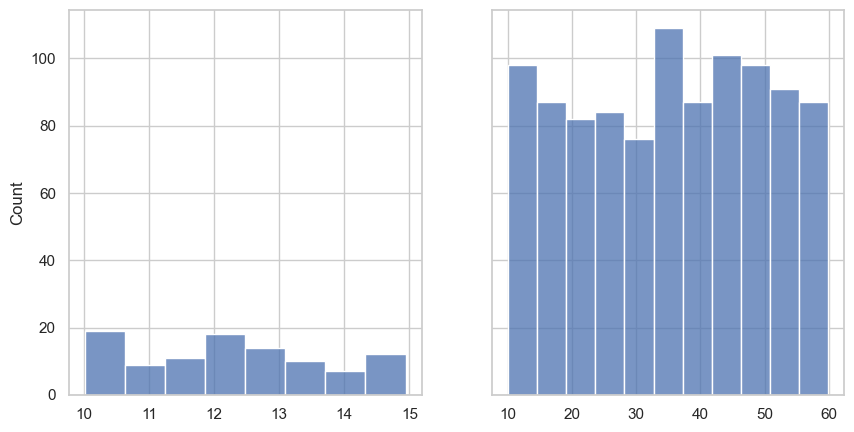

In [17]:
fig, axes = plt.subplots(1, 2, sharey=True)
fig1 = sns.histplot(x = first, ax = axes[0])
fig2 = sns.histplot(x = second, ax = axes[1])

How are the two distributions different?

In [6]:
# They differ on the range of the generated numbers and the number of generated numbers.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [18]:
from scipy.stats import norm

In [19]:
def normal_numbers (average, std, count):
    my_normal = norm (average, std)
    random_numbers = my_normal.rvs(count)
    return random_numbers

In [26]:
first_norm = normal_numbers(10,1,1000)
second_norm = normal_numbers(10,50,1000)

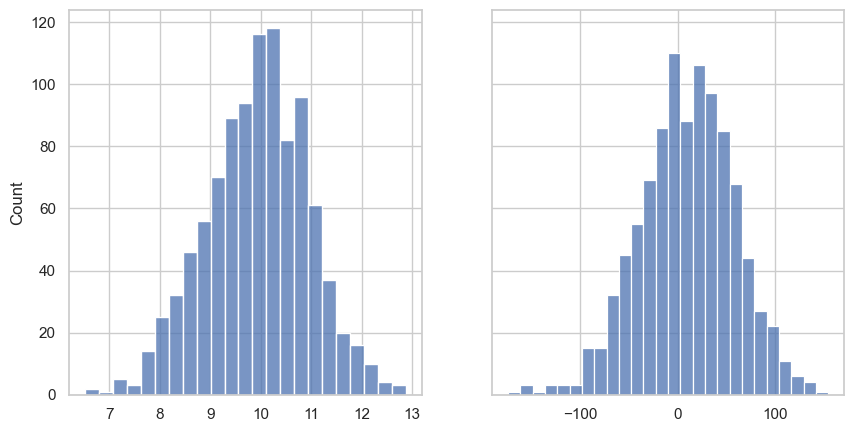

In [27]:
fig, axes = plt.subplots(1, 2, sharey=True)
fig1 = sns.histplot(x = first_norm, ax = axes[0])
fig2 = sns.histplot(x = second_norm, ax = axes[1])

How are the two distributions different?

In [8]:
# They differ on the standard deviation.
# If we look at the X axis, the scale is completely different: 
# the one on the right (second_norm) has a wider dispersion of values due to a higher std.

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [28]:
import pandas as pd

In [44]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


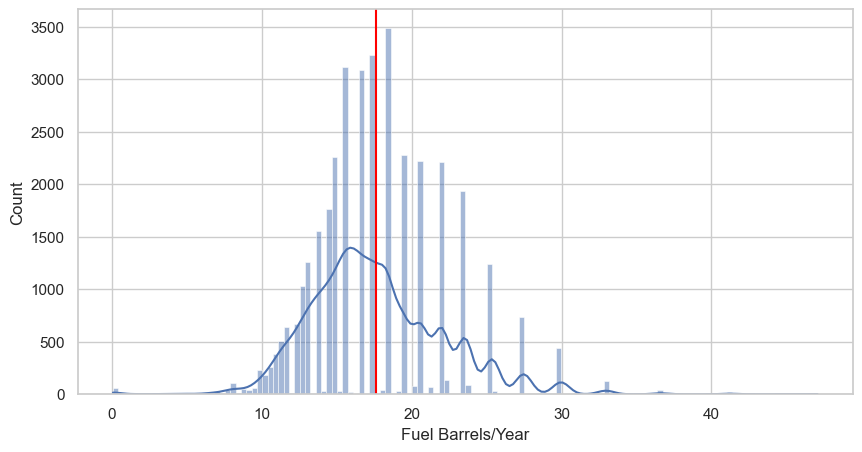

In [169]:
fig = sns.histplot(x = 'Fuel Barrels/Year', data = vehicles, kde=True)
fig.axvline(x = vehicles['Fuel Barrels/Year'].mean(), color="red");

In [167]:
from scipy import stats

In [178]:
shapiro_test_1 = stats.shapiro(vehicles['Fuel Barrels/Year'])
shapiro_test_1

C:\Users\mplan\anaconda3\envs\Ironhack\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.967258095741272, pvalue=0.0)

2. CO2 Emission Grams/Mile 

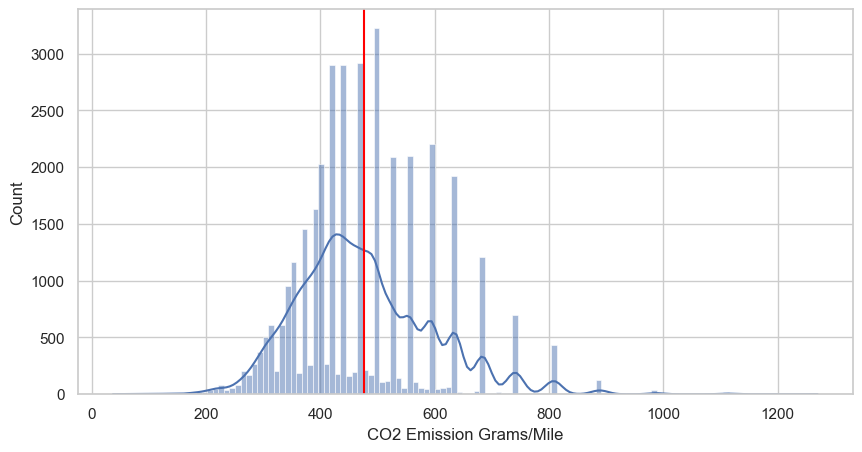

In [170]:
fig = sns.histplot(x = 'CO2 Emission Grams/Mile', data = vehicles, kde =True)
fig.axvline(x = vehicles['CO2 Emission Grams/Mile'].mean(), color="red");

In [179]:
shapiro_test_2 = stats.shapiro(vehicles['CO2 Emission Grams/Mile'])
shapiro_test_2

ShapiroResult(statistic=0.9675898551940918, pvalue=0.0)

3. Combined MPG

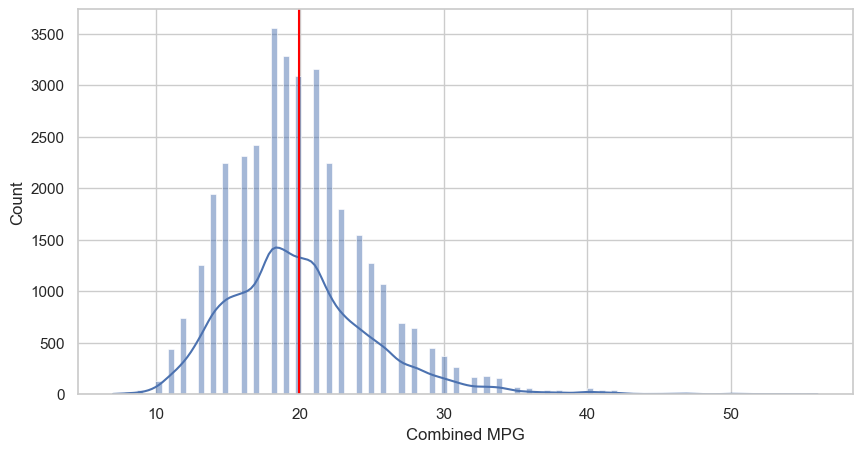

In [171]:
fig = sns.histplot(x = 'Combined MPG', data = vehicles, kde = True)
fig.axvline(x = vehicles['Combined MPG'].mean(), color="red");

In [180]:
shapiro_test_3 = stats.shapiro(vehicles['Combined MPG'])
shapiro_test_3

ShapiroResult(statistic=0.9466004967689514, pvalue=0.0)

Which one(s) of the variables are nearly normally distributed? How do you know?

In [12]:
# Combined MPG might be the one most similar to a Normal, though it's lacking counts as if it was a discrete variable 
# (it might be a discrete variable and therefore, cannot follow a normal distribution).
# Fuel Barrels/Year has unevenly distributed counts: more counts in the smaller side of the x axis.
# CO2 Emission Grams/mile has some counts in the middle of the distribution, where the counts should be greater.
# Both are incompatible with the normal distribution

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 2 and 200. 

1. Use the function to generate two number sequences with the size of 1000 for both.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [57]:
import numpy as np

In [134]:
def exp_numbers(mean, size):
    return np.random.exponential(scale = mean, size = size)

In [143]:
first_exp = exp_numbers(2, 10000)
second_exp = exp_numbers(200, 10000)
print(first_exp.mean(), second_exp.mean())

1.9870484913919464 201.5868673423573


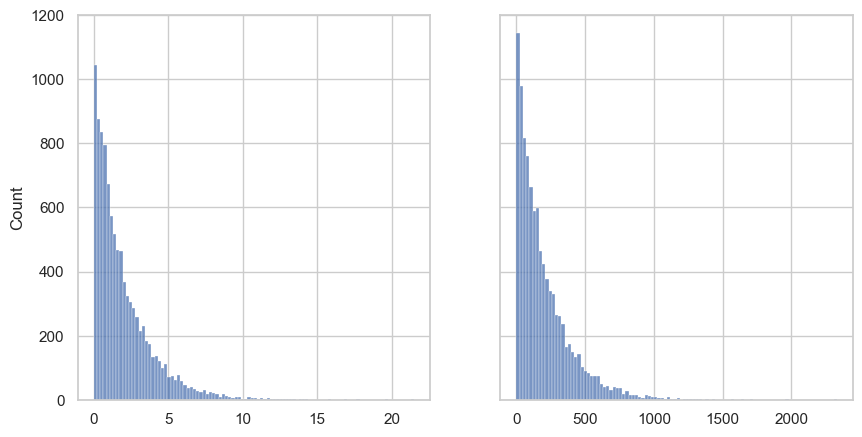

In [176]:
fig, axes = plt.subplots(1, 2, sharey=True)
fig1 = sns.histplot(x = first_exp, ax = axes[0], bins = 100)
fig2 = sns.histplot(x = second_exp, ax = axes[1], bins = 100)

How are the two distributions different?

In [14]:
# They differ in the mean, which results in a change in the scale of the x axis.

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [145]:
from scipy.stats import expon
# Hint: This is same as saying P(x<15)

In [164]:
time = expon(scale = 10)
print('probability is:', time.cdf(15))

probability is: 0.7768698398515702


What is the probability that the customer will spend more than 15 minutes

In [165]:
1 - time.cdf(15)

0.2231301601484298